# Machine Learning for Everyone Personal Learning
#### The code below is based on the above same titled tutorial course from FreeCampCamp https://youtu.be/i_LwzRVP7bg

### Import Libraries to be used

In [60]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Data Loading and Preparation

In [61]:
# import the file
teles_df = pd.read_csv('./magic04.data', header=None)

In [62]:
teles_df.head()

0         1       2       3       4         5        6        7   \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

        8         9  10  
0  40.0920   81.8828  g  
1   6.3609  205.2610  g  
2  76.9600  256.7880  g  
3  10.4490  116.7370  g  
4   4.6480  356.4620  g

In [63]:
#change the column names 
col_names = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long', 'fM3Trans', 'fAplha','fDist','class']

teles_df.columns = col_names

teles_df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAplha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [64]:
# unique classes
teles_df['class'].unique()

array(['g', 'h'], dtype=object)

In [65]:
#Convert classes to numbers using mapping.
map = {
    'g':1,
    'h':0
}
teles_df['class'] = teles_df['class'].map(map)

In [66]:
# check the output to see
teles_df.tail()

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAplha     fDist  class  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0

#### Exploratory Data Analysis

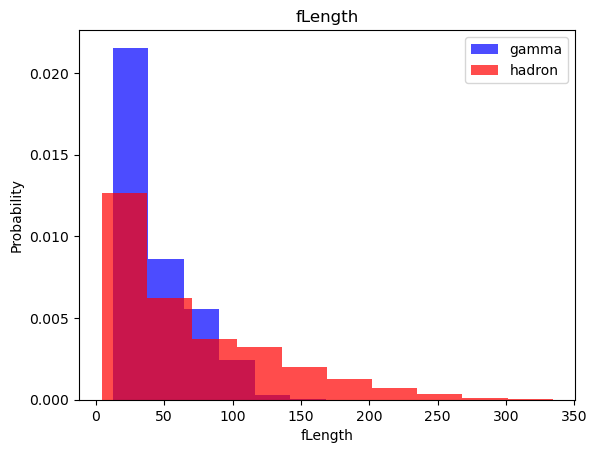

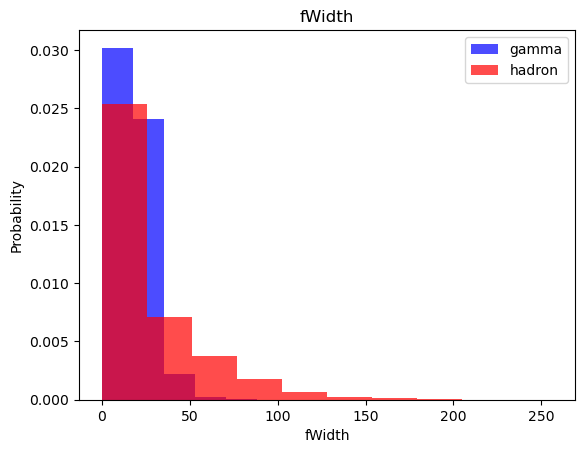

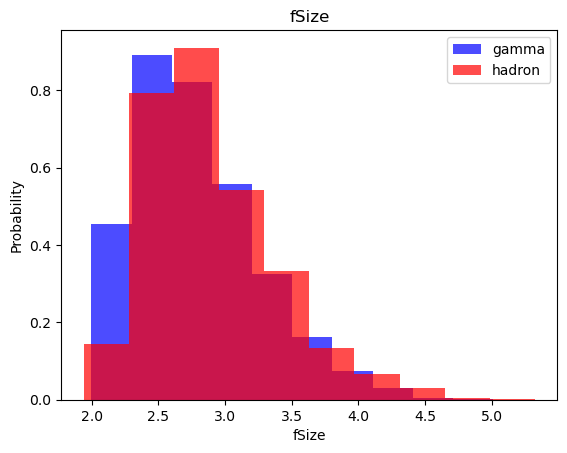

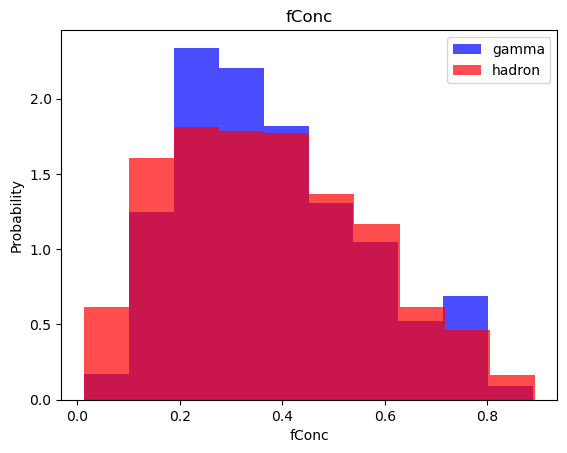

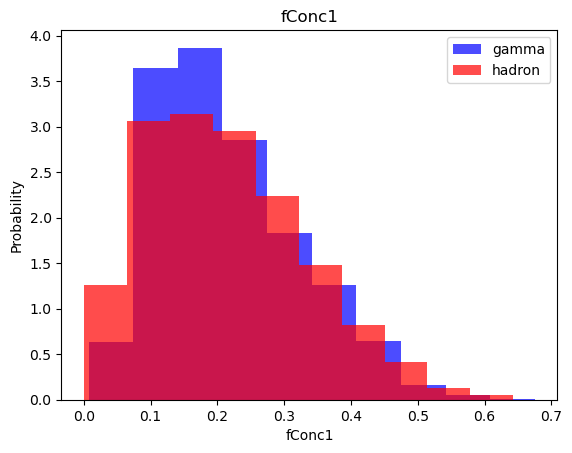

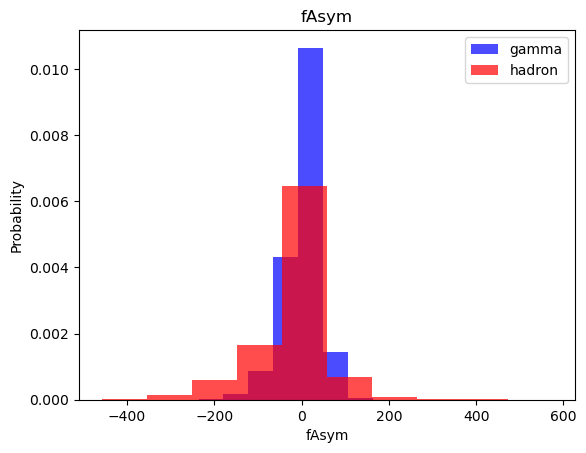

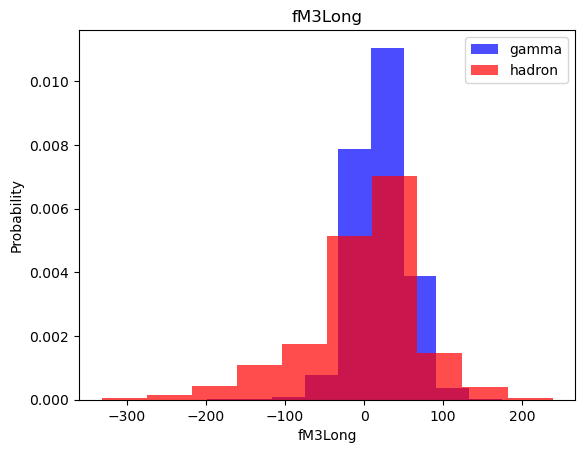

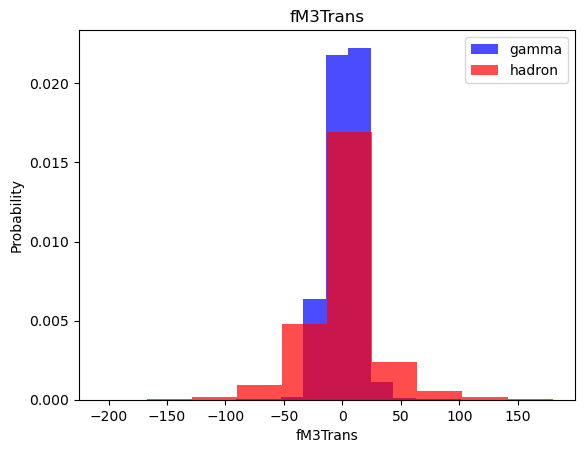

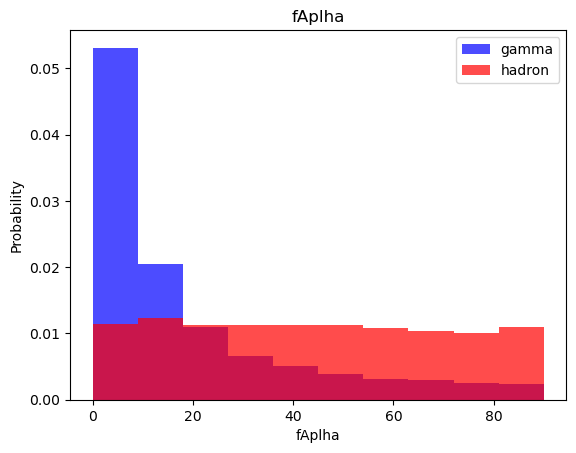

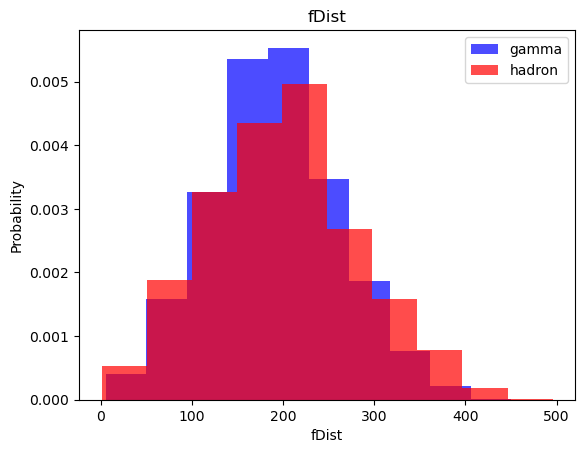

In [67]:
#Exploratory data analysis
# plot a histogram showing the distribution of classes for each attribute
for label in col_names[:-1]:
    plt.hist(teles_df[teles_df['class']==1][label], color='blue', label='gamma', alpha = 0.7, density = True)
    plt.hist(teles_df[teles_df['class']==0][label], color='red', label='hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Data Scaling and preparation of training, validation and test sets

In [68]:
#Scale the data using min-max
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    #Equalize the normal of the classes in the dataset
    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    
    data = np.hstack((x,np.reshape(y,(-1,1))))
                     
    return data, x,y

In [69]:
#set training, validation and test set
train, valid, test = np.split(teles_df.sample(frac=1), [int(0.6*len(teles_df)), int(0.8*len(teles_df))])

In [70]:
print("No. of Gamma:",len(train[train['class']==1])) 
print("No. of Hadron:",len(train[train['class']==0]))

No. of Gamma: 7325
No. of Hadron: 4087


In [71]:
#Use the above function to fix the mismatch in the data above then split the data
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# Model Creation

#### K-Nearest Neighbours

In [72]:
# import library
from sklearn import neighbors, metrics
from sklearn.metrics import f1_score, classification_report

In [73]:
#create a knn model
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
y_pred = clf_knn.predict(x_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1315
           1       0.84      0.88      0.86      2489

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.81      0.81      0.81      3804



### Naive Bayes

In [76]:
#import library
from sklearn.naive_bayes import GaussianNB

In [77]:
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)

GaussianNB()

In [78]:
y_pred = clf_nb.predict(x_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.51      1315
           1       0.74      0.89      0.81      2489

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.71      3804



#### Logistic Regression

In [80]:
#import libraries
from sklearn.linear_model import LogisticRegression

In [81]:
#make classifier
clf_log = LogisticRegression()
clf_log.fit(x_train, y_train)

LogisticRegression()

In [82]:
y_pred = clf_log.predict(x_test)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1315
           1       0.84      0.82      0.83      2489

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



#### Support Vector Machines

In [89]:
#import libraries
from sklearn import svm

In [90]:
clf_svm = svm.SVC()
#fit data
clf_svm.fit(x_train,y_train)

SVC()

In [91]:
y_pred = clf_svm.predict(x_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1315
           1       0.89      0.89      0.89      2489

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#### Neural Networks

In [ ]:
#import library
@!pip  install tensorflow
#import tensorflow as tf

In [93]:
import tensorflow as tf

In [94]:
# plotting functions
def plot_history(history):
    fid, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary CrossEntrophy')
    ax1.grid(True)
    
    
    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()

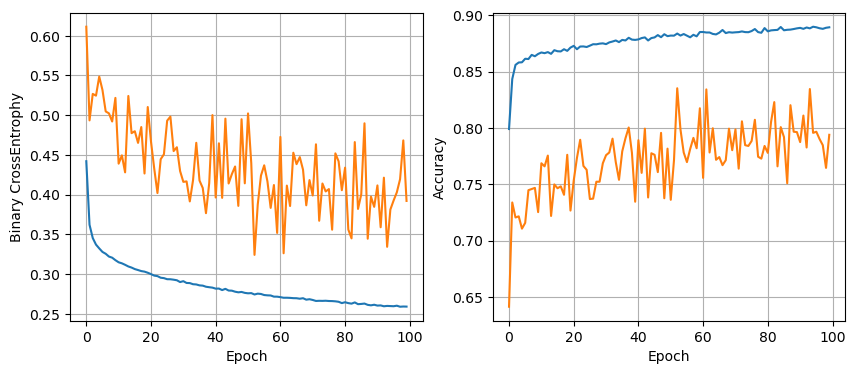

In [97]:
plot_history(history)

In [95]:
# create neural network model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [96]:
#train model
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose = 0)

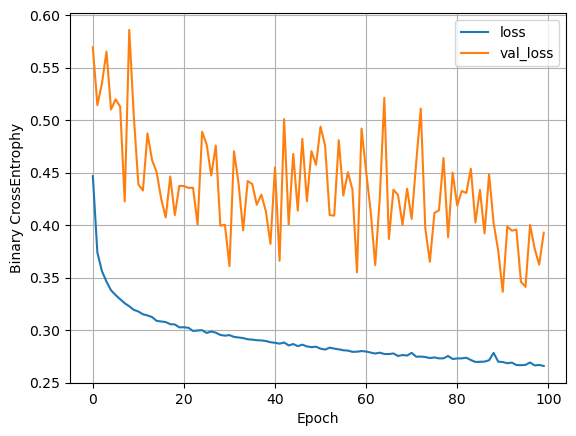

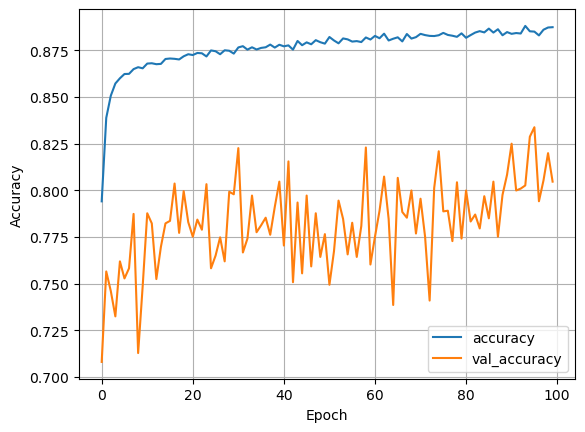

In [93]:
#plot graphs
plot_loss(history)
plot_accuracy(history)

In [98]:
# create neural network model
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr), loss = tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])
    #train model
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose = 0)
    
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


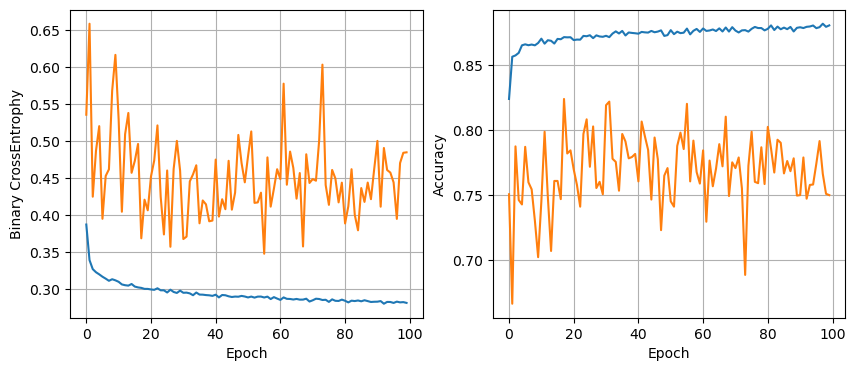

119/119 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.01, batch_size 64


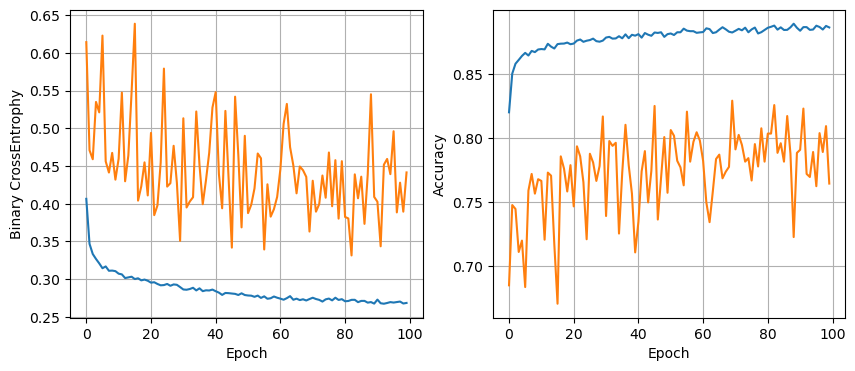

119/119 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8762
16 nodes, dropout 0, lr 0.01, batch_size 128


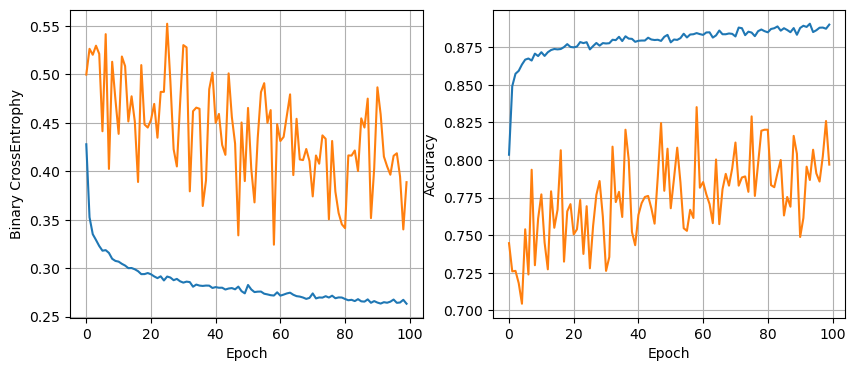

119/119 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.005, batch_size 32


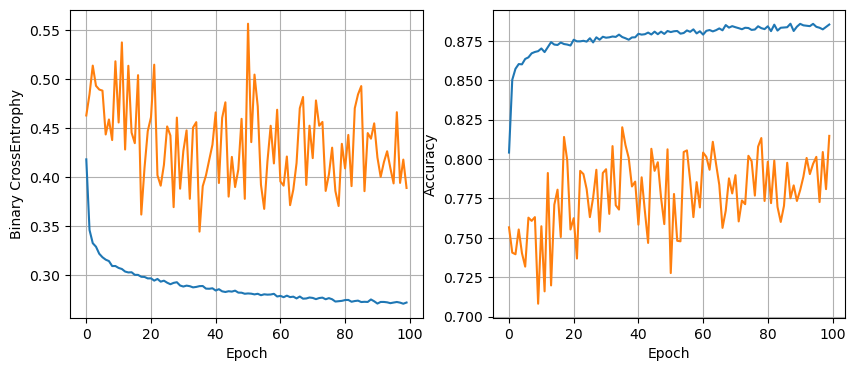

119/119 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.005, batch_size 64


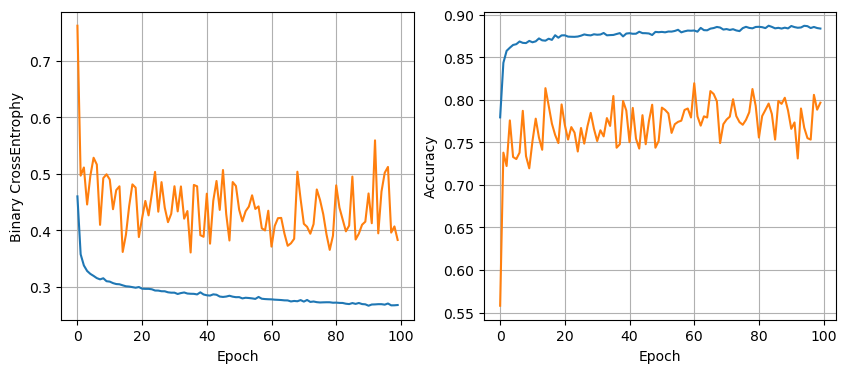

119/119 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.8691
16 nodes, dropout 0, lr 0.005, batch_size 128


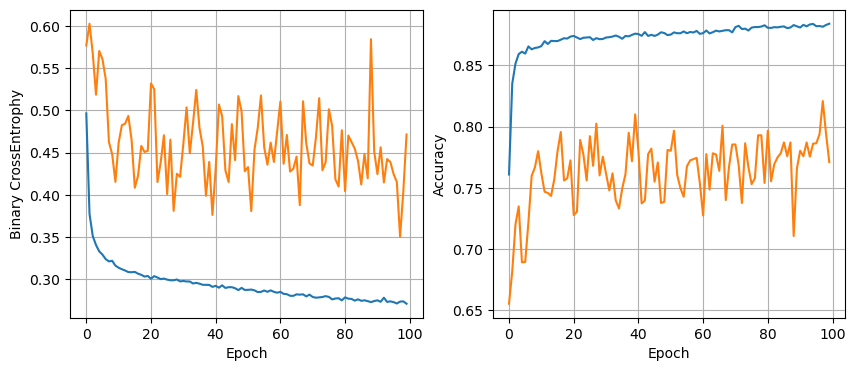

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8751
16 nodes, dropout 0, lr 0.001, batch_size 32


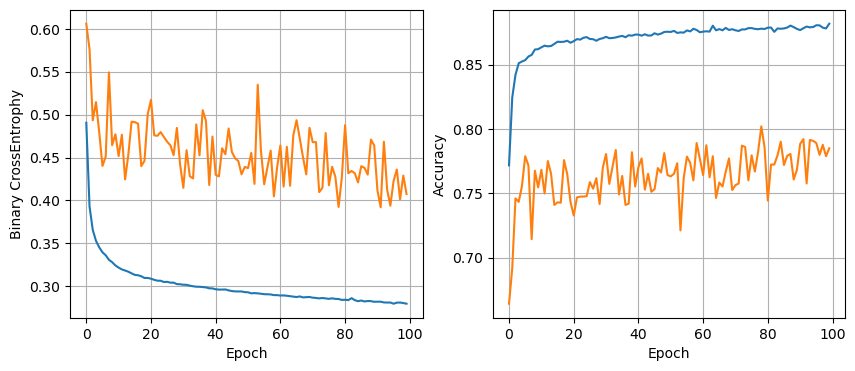

119/119 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.001, batch_size 64


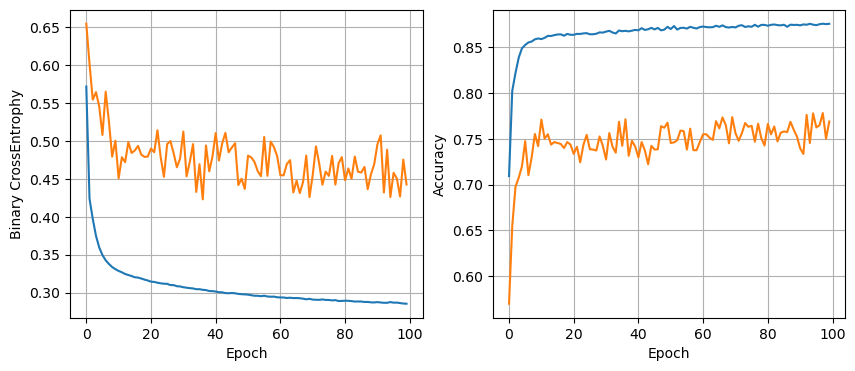

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8665
16 nodes, dropout 0, lr 0.001, batch_size 128


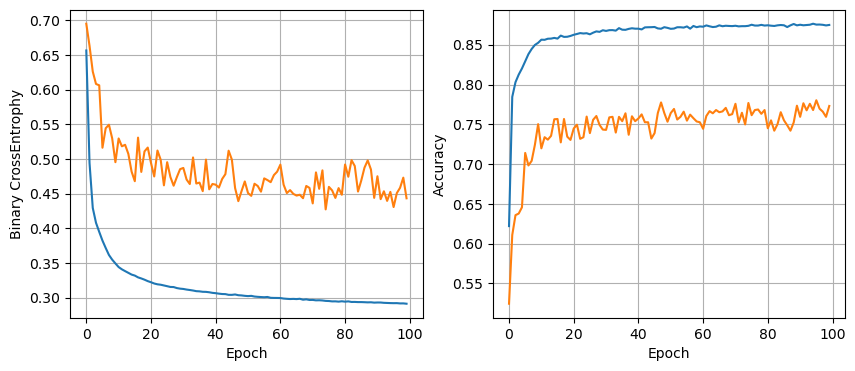

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8628
16 nodes, dropout 0.2, lr 0.01, batch_size 32


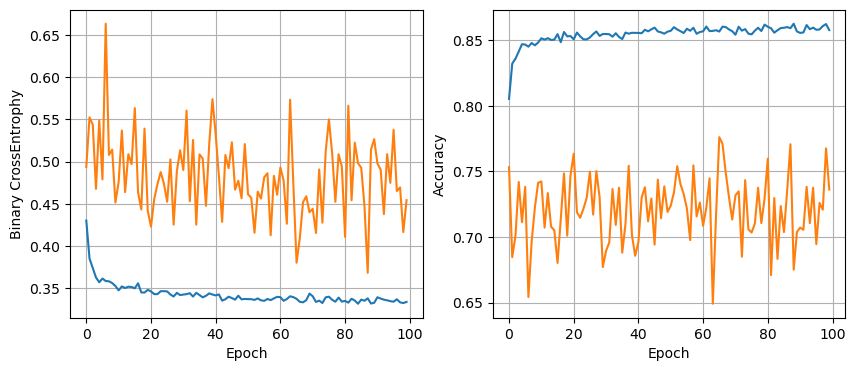

119/119 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.01, batch_size 64


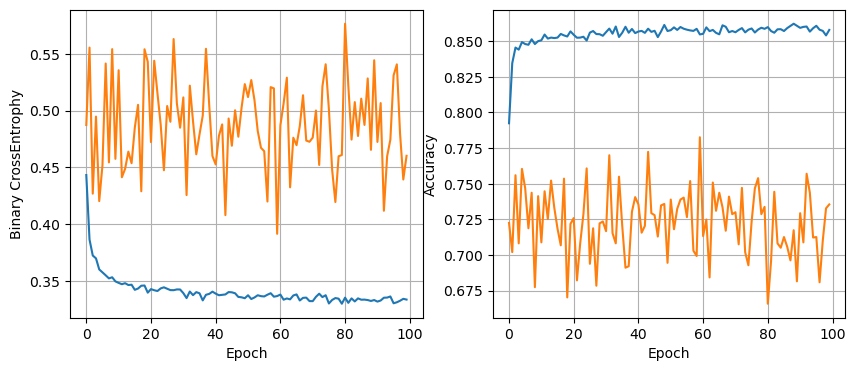

119/119 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.01, batch_size 128


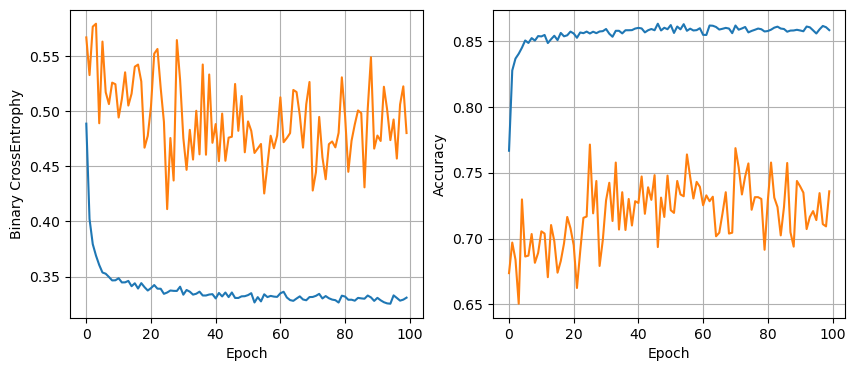

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8715
16 nodes, dropout 0.2, lr 0.005, batch_size 32


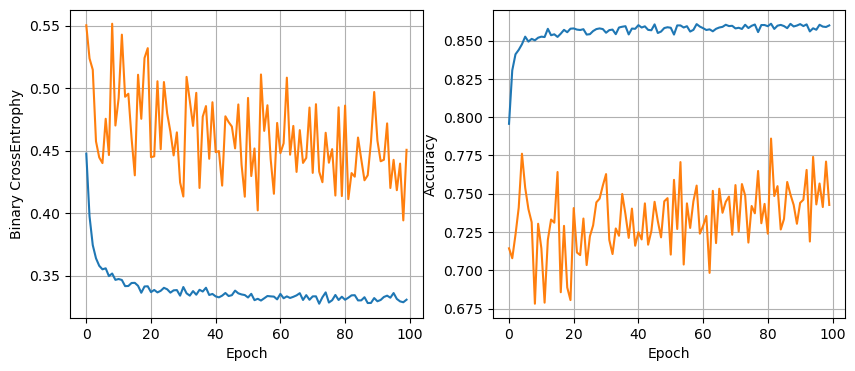

119/119 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8717
16 nodes, dropout 0.2, lr 0.005, batch_size 64


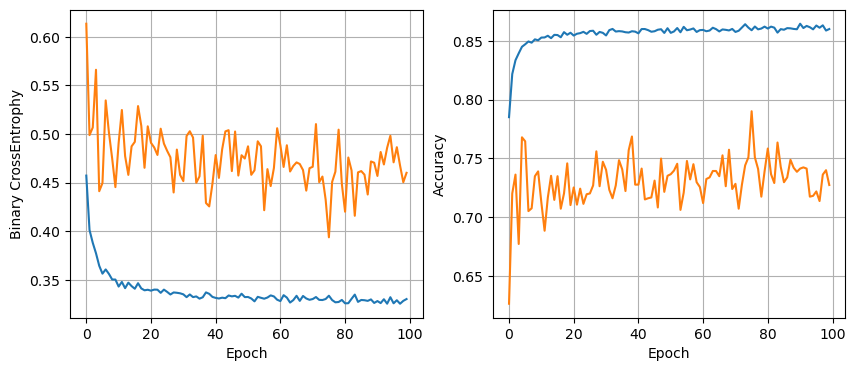

119/119 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.005, batch_size 128


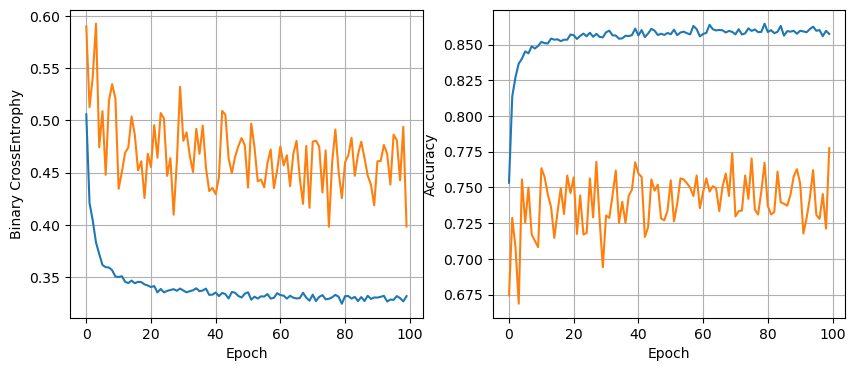

119/119 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8659
16 nodes, dropout 0.2, lr 0.001, batch_size 32


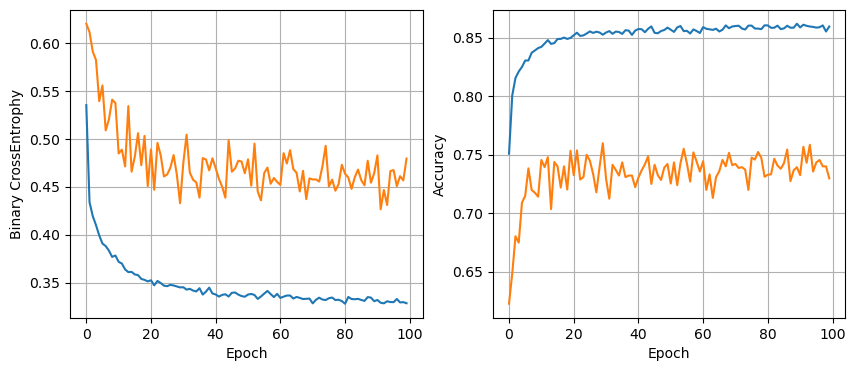

119/119 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.001, batch_size 64


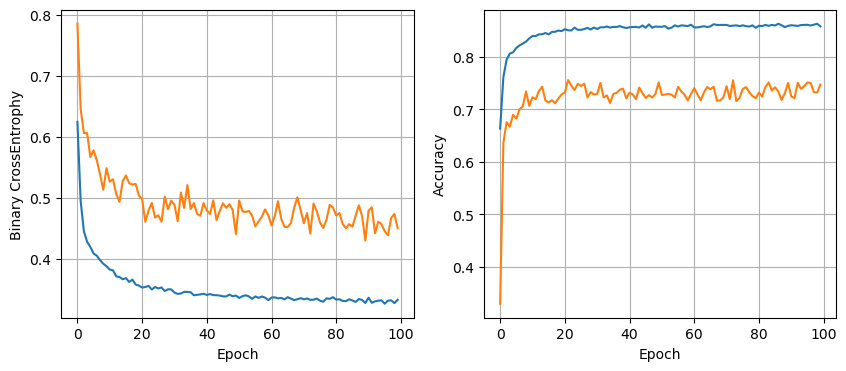

119/119 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.001, batch_size 128


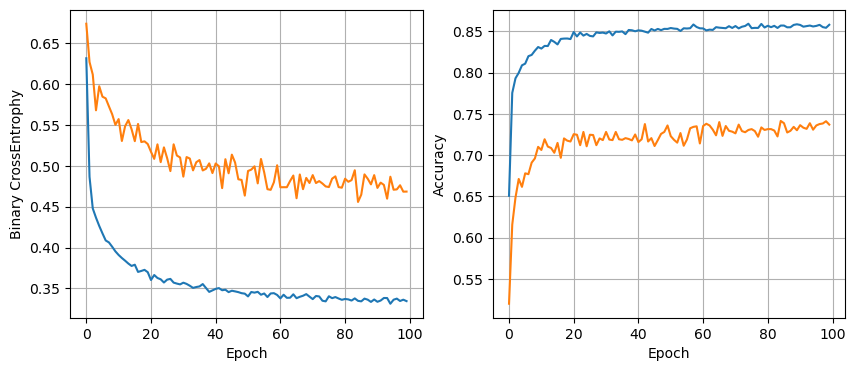

119/119 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.01, batch_size 32


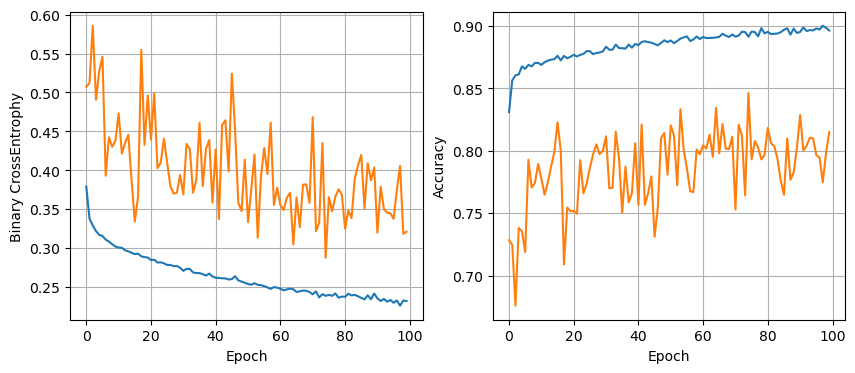

119/119 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8536
32 nodes, dropout 0, lr 0.01, batch_size 64


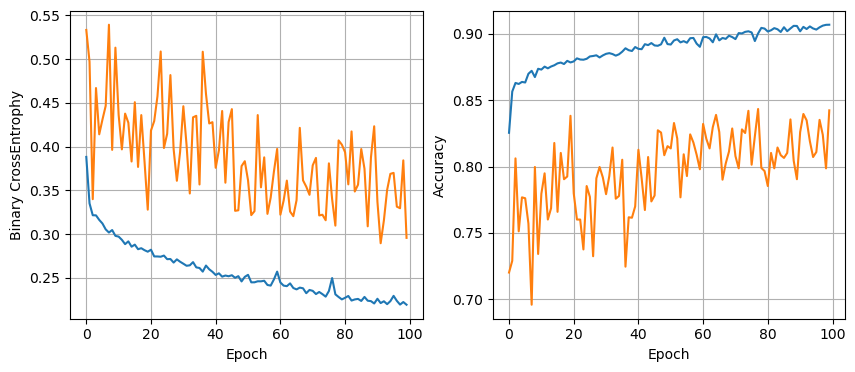

119/119 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.8615
32 nodes, dropout 0, lr 0.01, batch_size 128


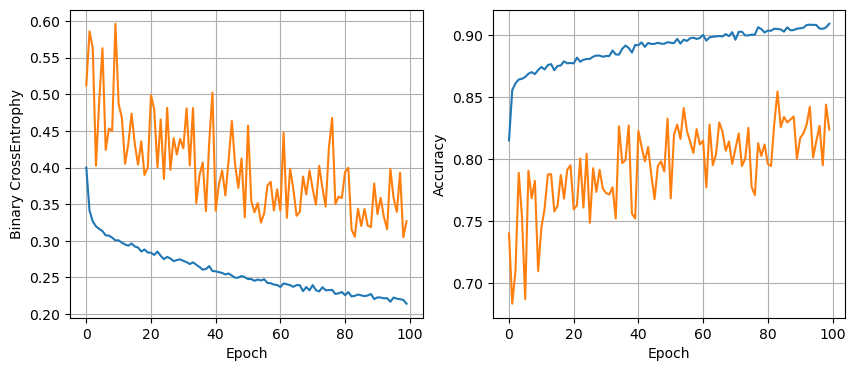

119/119 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.005, batch_size 32


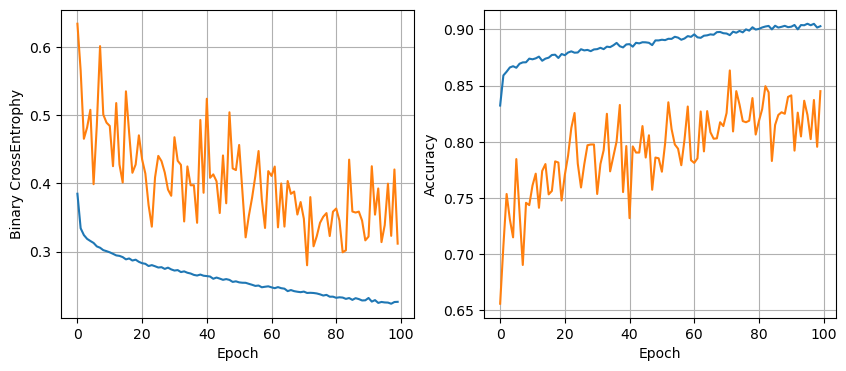

119/119 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8594
32 nodes, dropout 0, lr 0.005, batch_size 64


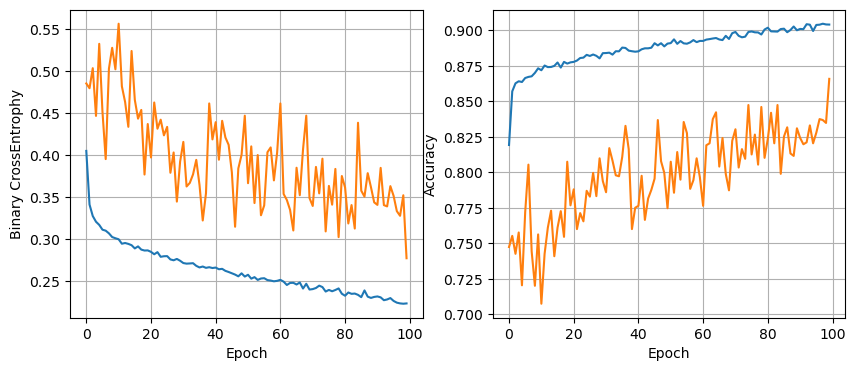

119/119 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8533
32 nodes, dropout 0, lr 0.005, batch_size 128


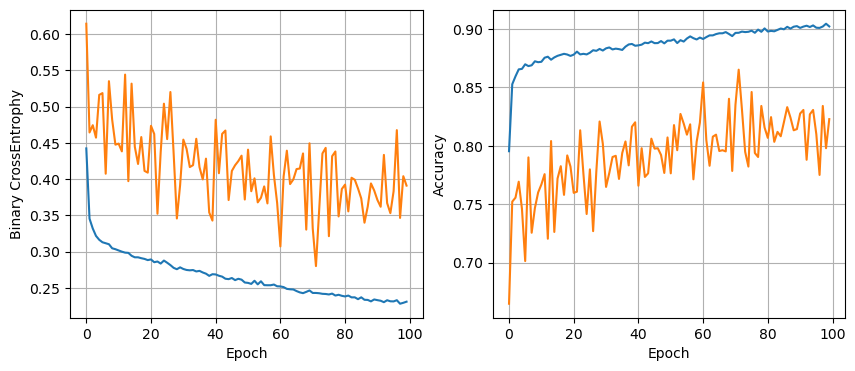

119/119 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8733
32 nodes, dropout 0, lr 0.001, batch_size 32


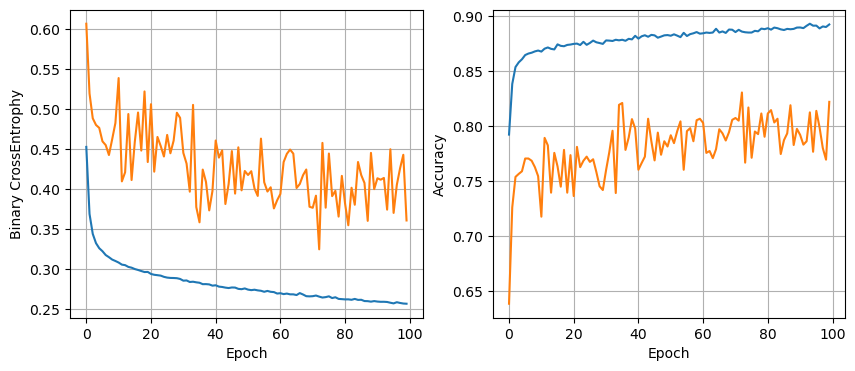

119/119 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.001, batch_size 64


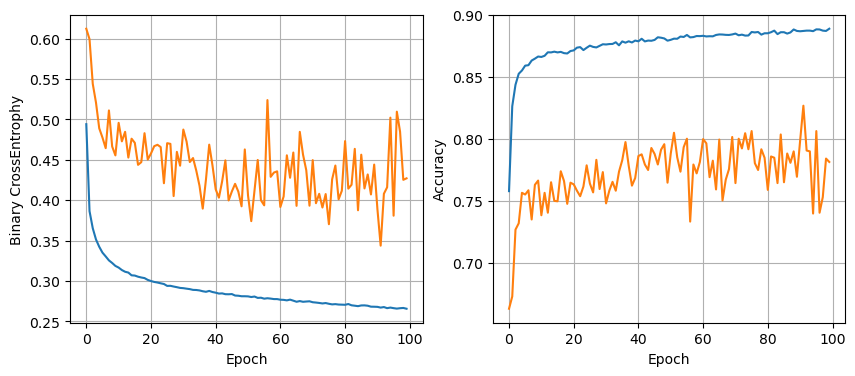

119/119 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8712
32 nodes, dropout 0, lr 0.001, batch_size 128


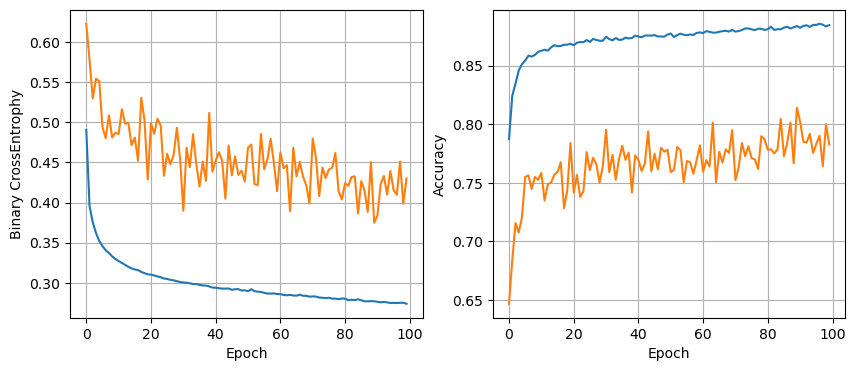

119/119 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.01, batch_size 32


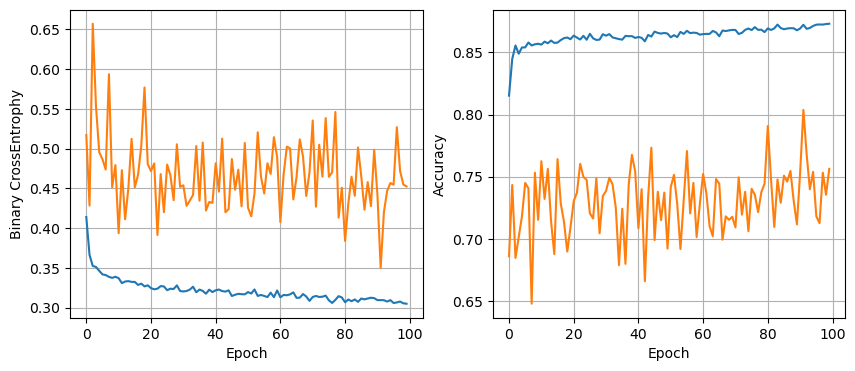

119/119 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8801
32 nodes, dropout 0.2, lr 0.01, batch_size 64


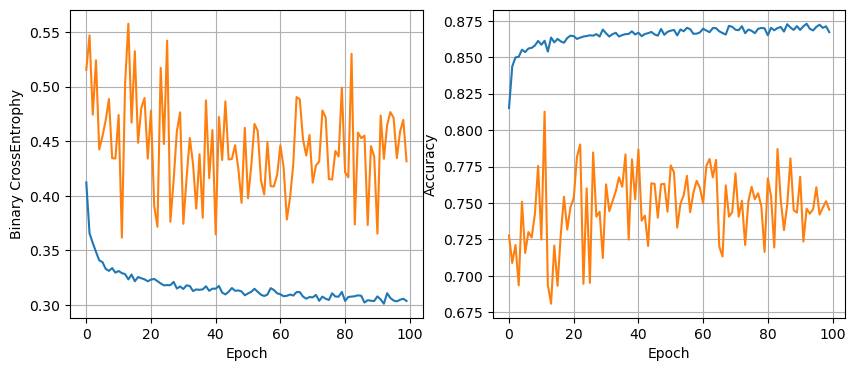

119/119 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.01, batch_size 128


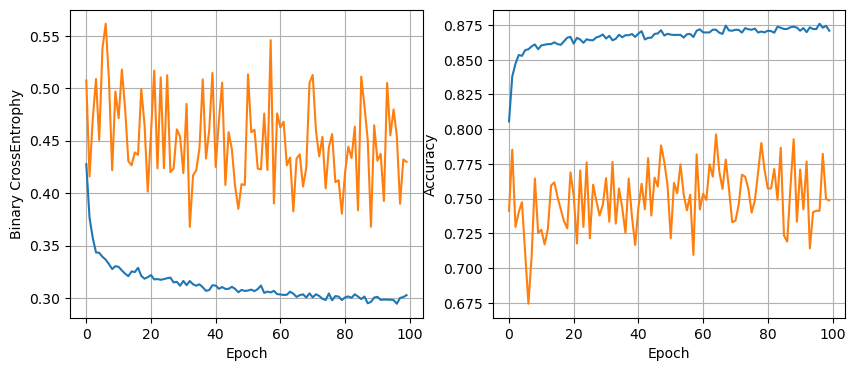

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.005, batch_size 32


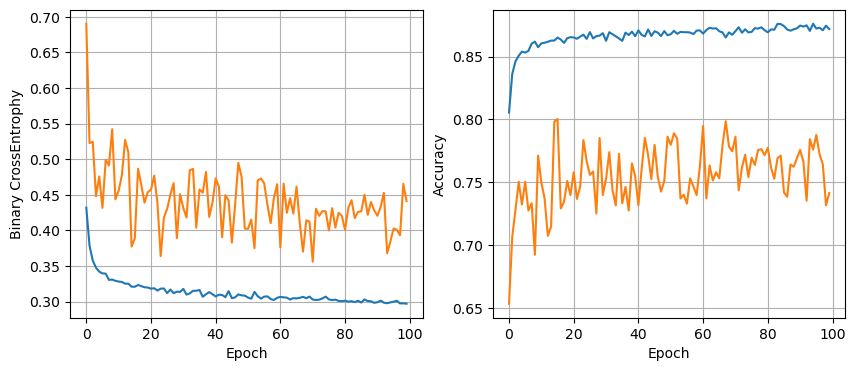

119/119 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.005, batch_size 64


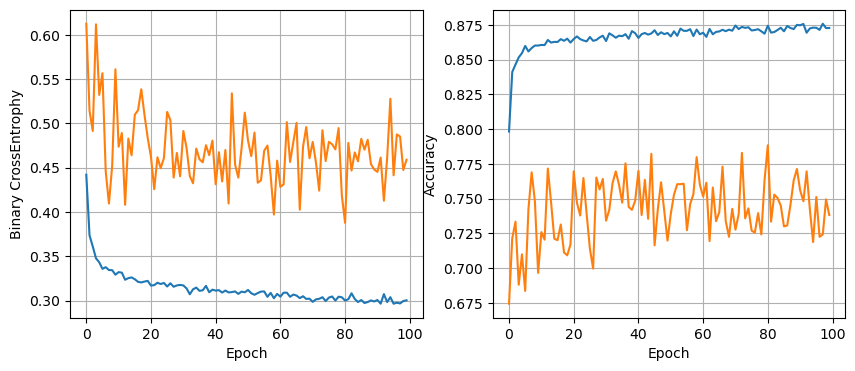

119/119 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8764
32 nodes, dropout 0.2, lr 0.005, batch_size 128


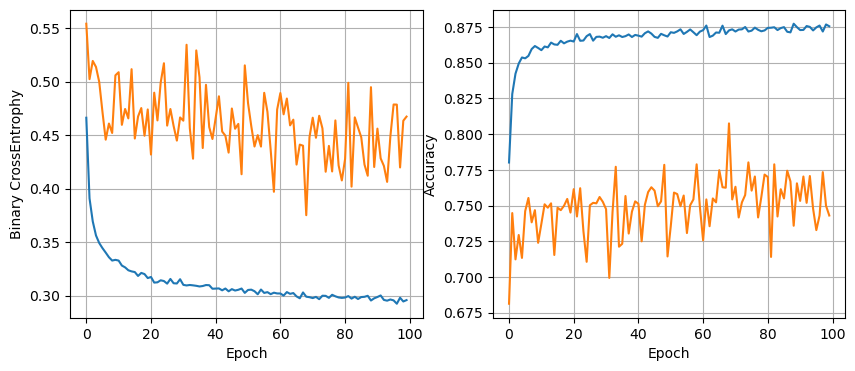

119/119 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.001, batch_size 32


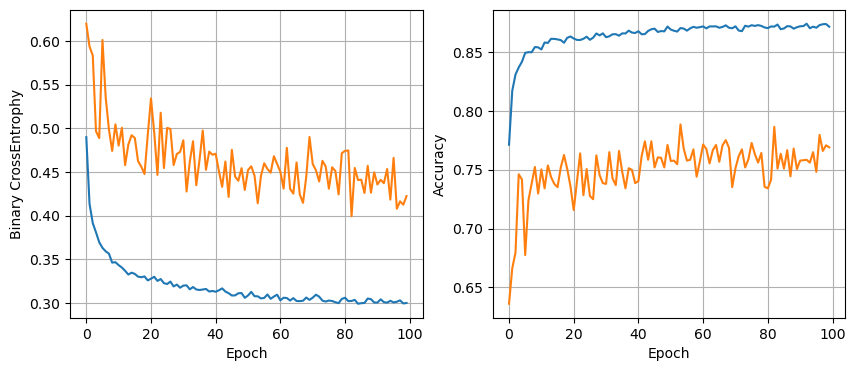

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8715
32 nodes, dropout 0.2, lr 0.001, batch_size 64


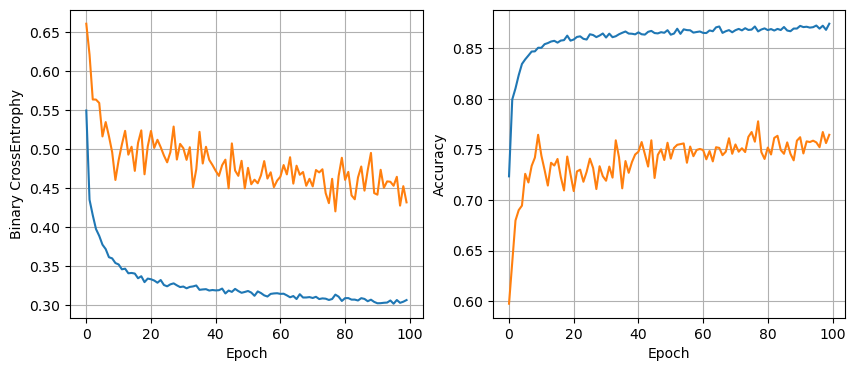

119/119 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.001, batch_size 128


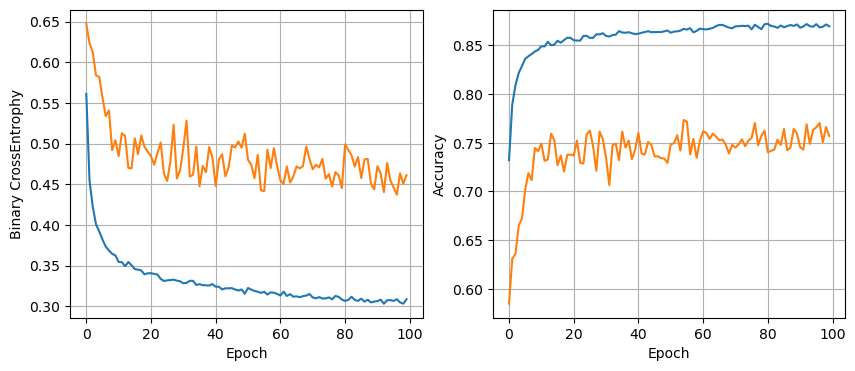

119/119 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8720
64 nodes, dropout 0, lr 0.01, batch_size 32


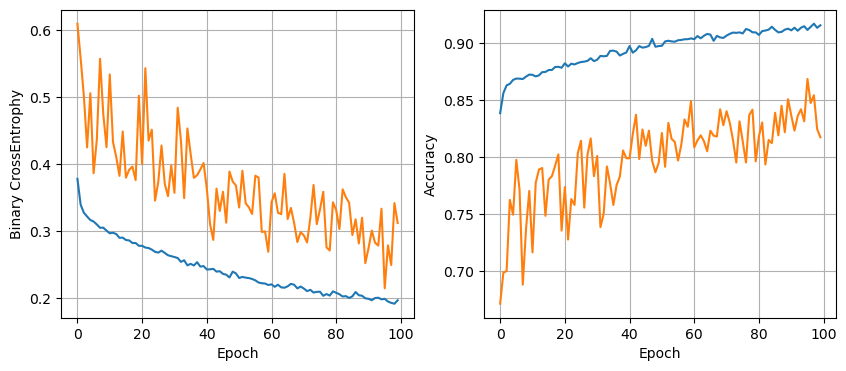

119/119 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.8644
64 nodes, dropout 0, lr 0.01, batch_size 64


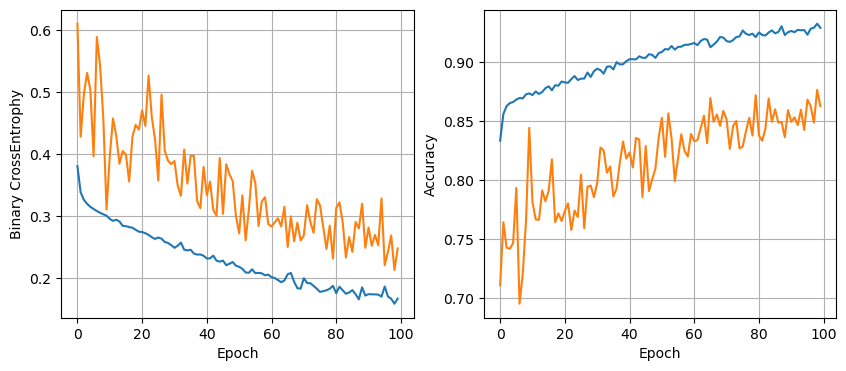

119/119 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.8644
64 nodes, dropout 0, lr 0.01, batch_size 128


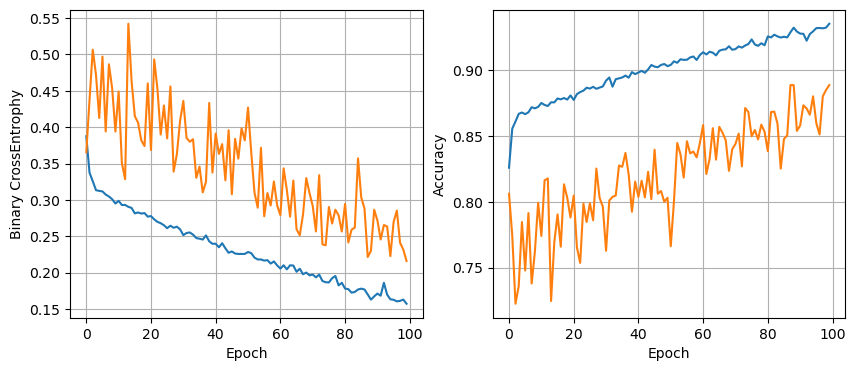

119/119 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.8491
64 nodes, dropout 0, lr 0.005, batch_size 32


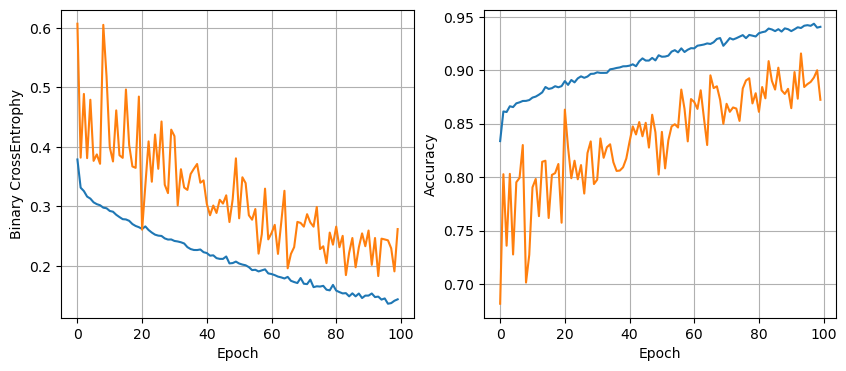

119/119 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.8544
64 nodes, dropout 0, lr 0.005, batch_size 64


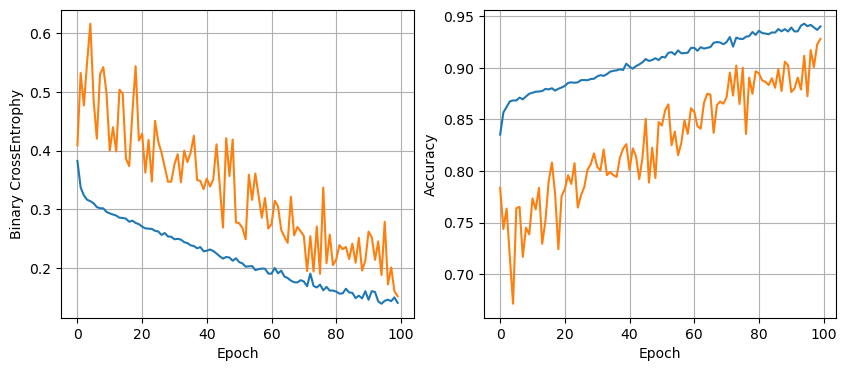

119/119 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.8460
64 nodes, dropout 0, lr 0.005, batch_size 128


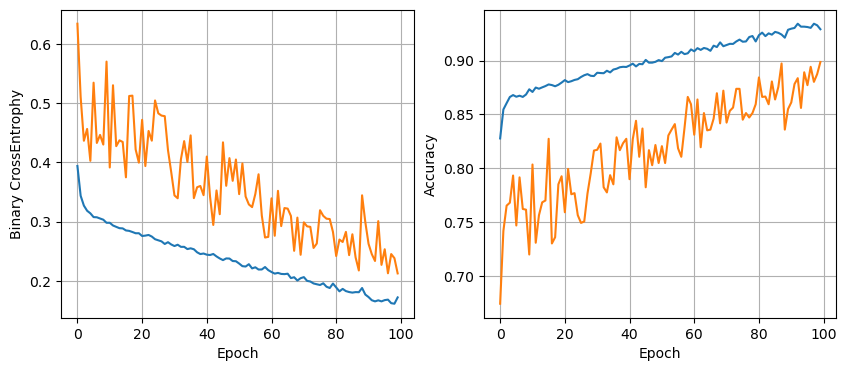

119/119 [==============================] - 0s 1ms/step - loss: 0.5411 - accuracy: 0.8473
64 nodes, dropout 0, lr 0.001, batch_size 32


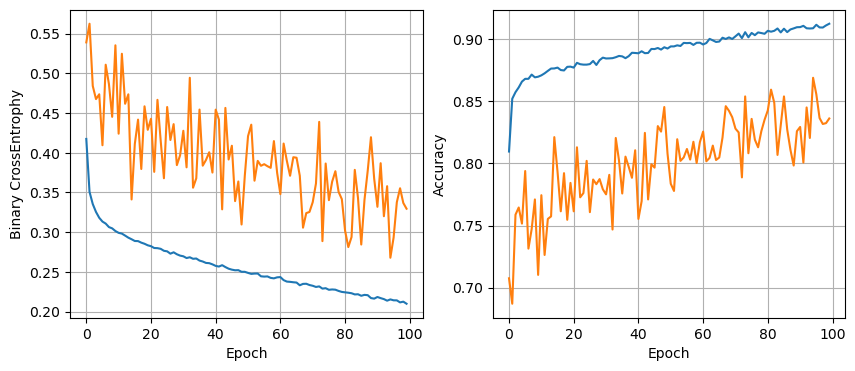

119/119 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8651
64 nodes, dropout 0, lr 0.001, batch_size 64


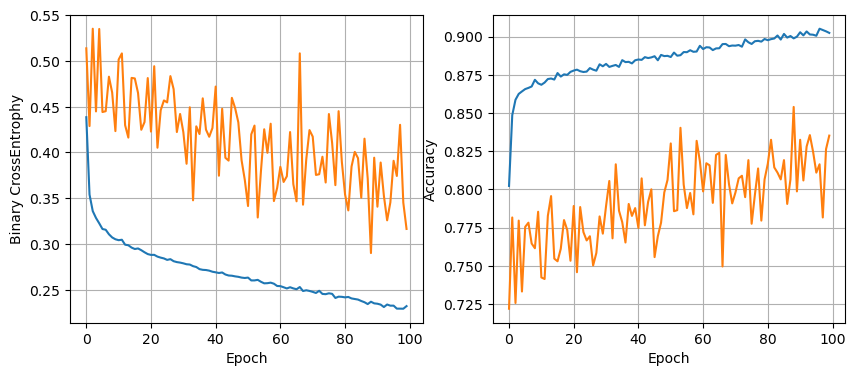

119/119 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8609
64 nodes, dropout 0, lr 0.001, batch_size 128


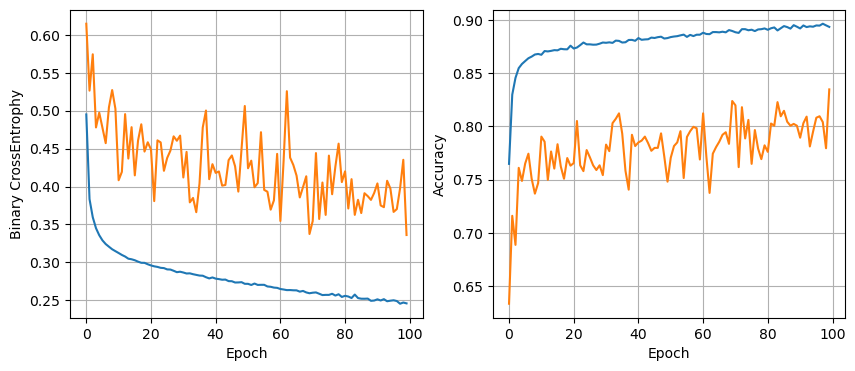

119/119 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8670
64 nodes, dropout 0.2, lr 0.01, batch_size 32


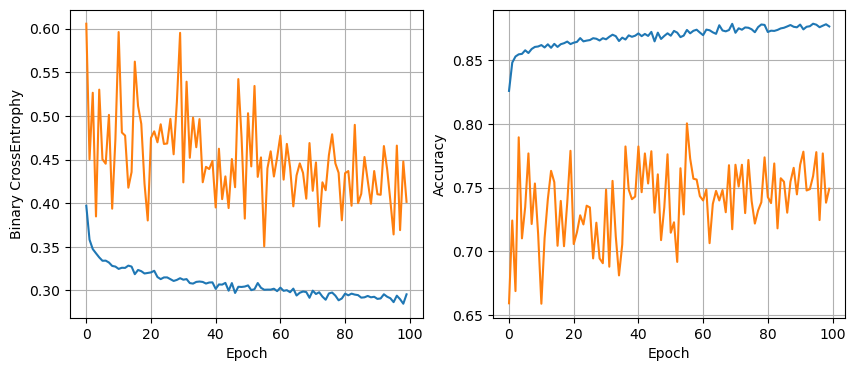

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.01, batch_size 64


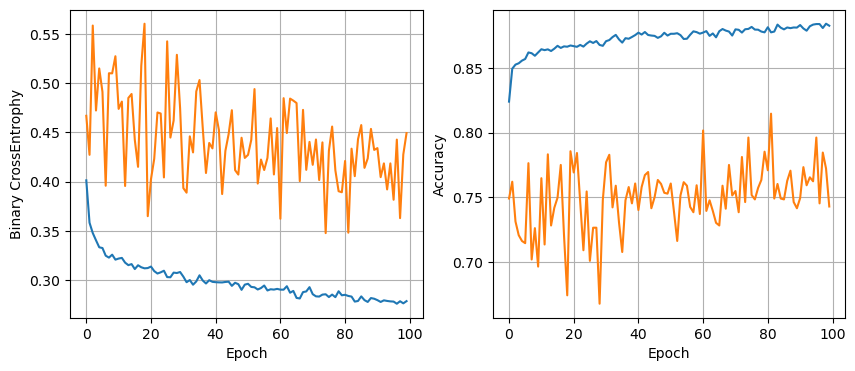

119/119 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.01, batch_size 128


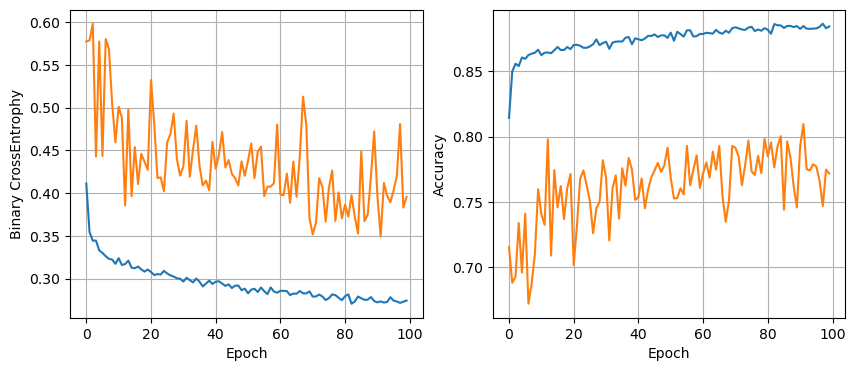

119/119 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.005, batch_size 32


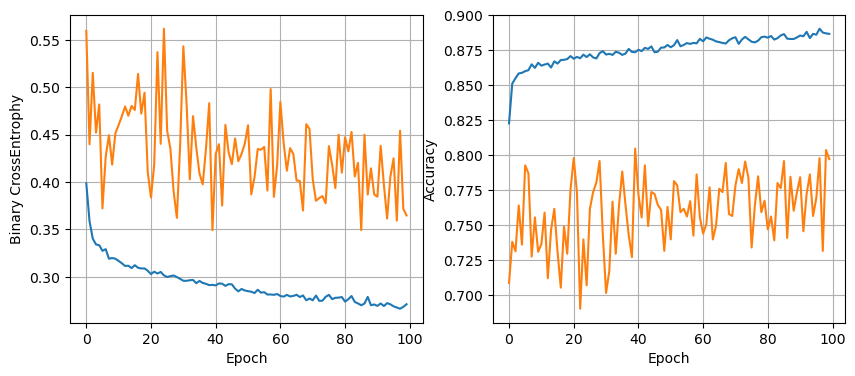

119/119 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8762
64 nodes, dropout 0.2, lr 0.005, batch_size 64


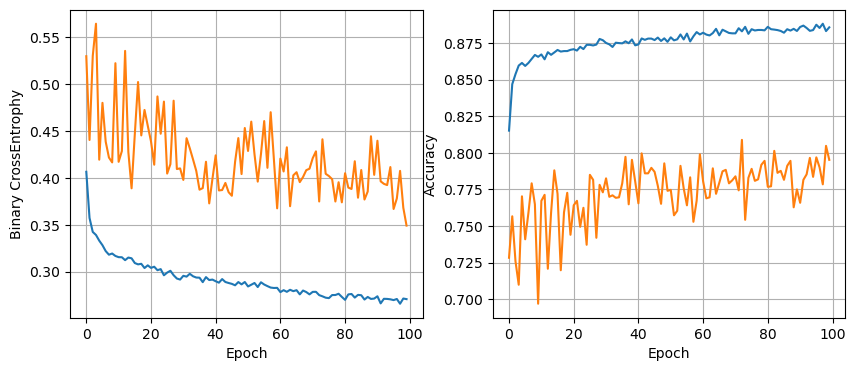

119/119 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8783
64 nodes, dropout 0.2, lr 0.005, batch_size 128


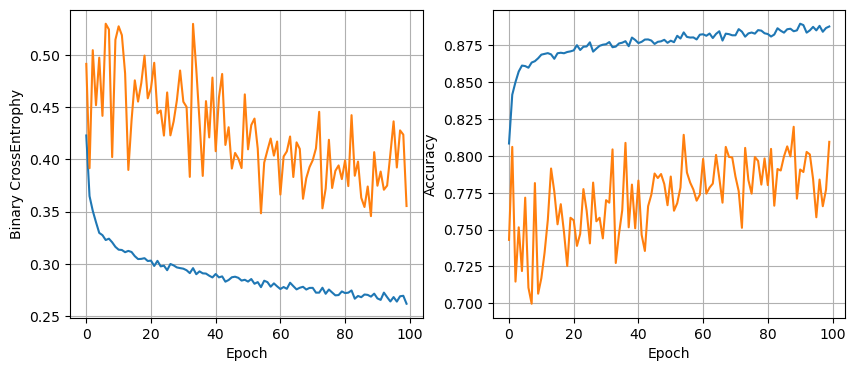

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8785
64 nodes, dropout 0.2, lr 0.001, batch_size 32


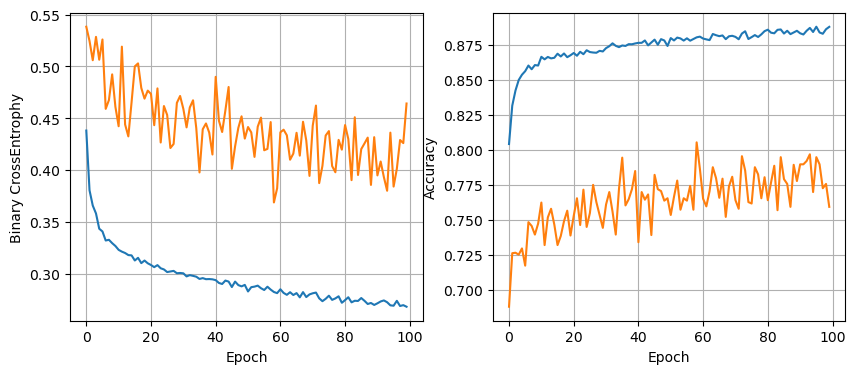

119/119 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8804
64 nodes, dropout 0.2, lr 0.001, batch_size 64


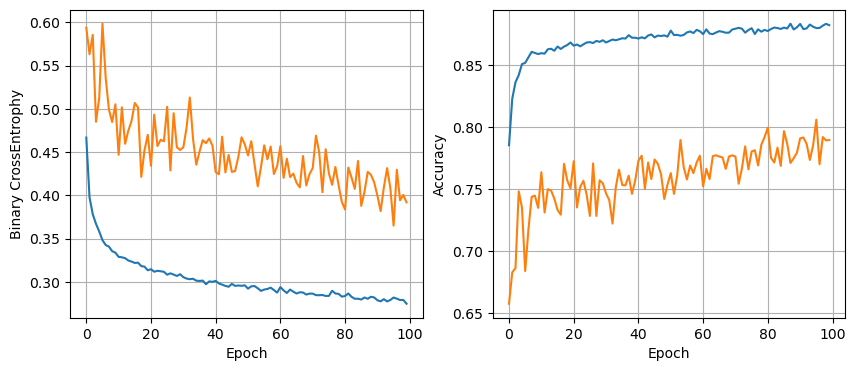

119/119 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.001, batch_size 128


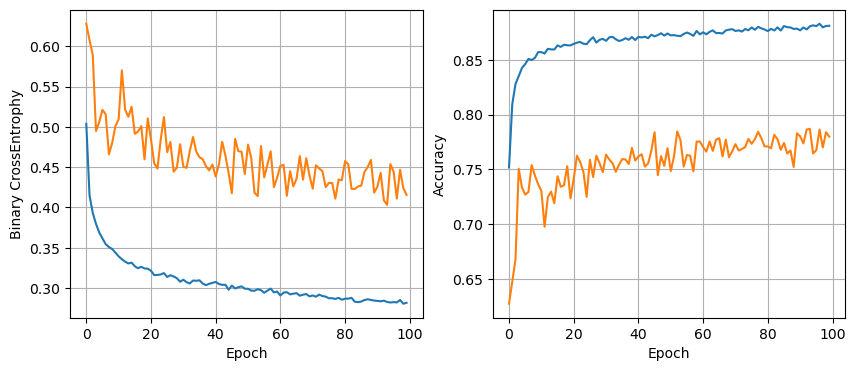

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8743


In [99]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)
                if val_loss[0] <= least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model
